## 불용어 처리 코드

* 작성자: 박하람
* 워드클라우드 시각화를 위한 stopwords 처리

In [1]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"
!pip install wordcloud

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports In

In [2]:
import pandas as pd
import numpy as np 
import re

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
  font_name = font_manager.FontProperties(fname = font_fname).get_name()
  plt.rcParams["font.family"] = font_family

%matplotlib inline

In [4]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath,size=9)

In [5]:
import nltk 
from konlpy.tag import Okt 

# 여기에서부터 시작! 


In [6]:
def make_wordcloud_data(df, stopwords): 
  okt = Okt()
  sentences = ''

  for each_line in df['청원내용']: 
    sentences = sentences + each_line + '\n'

  tokens_ko = okt.nouns(sentences)
  tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
  ko = nltk.Text(tokens_ko, name='청원내용 분석')
  
  data = dict(ko.vocab().most_common(150))
  return data

In [7]:
def make_wordcloud(data):
    wordcloud = WordCloud(font_path=fontpath,
                      max_font_size = 100, 
                      relative_scaling = 0.4,
                      background_color='white',).generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    wordcloud.to_file('wordcloud image.png')

In [9]:
petition1 = pd.read_csv('petition-0.csv', index_col=0)
petition1 = petition1.sort_values('청원시작일')
petition1.head()

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원인,월,년
3,중국에서시작한 '우한폐렴' 코로나바이러스 한국에퍼지지않도록해주세요,2020-01-23,2020-02-22,63674,https://www1.president.go.kr/petitions/584598,보건복지,뉴스를보다가 우한폐렴 걸린사람이 대한민국국민에도있다고하네요 중국에서는 인간과인간의접...,naver,1,2020
4,중국인 입국 금지 요청,2020-01-23,2020-02-22,761833,https://www1.president.go.kr/petitions/584593,보건복지,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,naver,1,2020
2,인천 영종도에 종합병원 개설을 요구합니다.,2020-01-29,2020-02-28,1667,https://www1.president.go.kr/petitions/584647,보건복지,대한민국 최대 여객터미널인 인천국제공항이 있는 영종도에 종합 의료시설이 급히 필요합...,kakao,1,2020
1,국민세금으로 가는 공무원 해외연수 특례 폐지를 청원합니다,2020-01-30,2020-02-29,7763,https://www1.president.go.kr/petitions/584662,정치개혁,저는 충남 예산에 살고 있는 아이 둘의 엄마입니다. 국민세금으로 충당되는 지자체 공...,naver,1,2020
0,신종 코로나 바이러스로 인한 한시적 공매도 금지를 강력히 요구합니다!!!,2020-01-31,2020-03-01,1858,https://www1.president.go.kr/petitions/584668,경제민주화,우리나라 주식시장이 그동안 공매도로 인해 몸살을 앓고 있습니다.그런 와중에 이번 신...,naver,1,2020


In [10]:
petition2 = pd.read_csv('petition-1.csv', index_col=0)
petition2 = petition2.sort_values('청원시작일')
petition2.head()

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원인,월,년
1239,친딸 성폭행범 사회에서 완전 격리시켜주세요.,2020-03-01,2020-03-31,4396,https://www1.president.go.kr/petitions/585901,인권/성평등,저는 시청자입니다..오늘 궁금한 이야기y를 보고 자녀를 키우는 부모로써너무 마음이 ...,naver,3,2020
1237,코로나 경제위기에 <재난국민소득>을 50만원씩 어려운 국민들에게 지급해주세요,2020-03-01,2020-03-31,6735,https://www1.president.go.kr/petitions/585899,일자리,<재난 기본소득 50만원을 어려운 국민들에게 지급해주세요>코로나19로 인한 심각한 ...,facebook,3,2020
1238,가마니살인사건 범죄자를 강력처벌해주세요,2020-03-01,2020-03-31,4463,https://www1.president.go.kr/petitions/585900,기타,코로나로 인해 모두 힘든시국입니다 저도 건강보험공단의 콜을 받으며 1339전화 가 ...,facebook,3,2020
1203,계좌출금정지 방법 마련 촉구(인터넷 사기거래 및 피싱 등),2020-03-02,2020-04-01,310,https://www1.president.go.kr/petitions/585933,기타,민관군 모든 국민이 코로나19로 힘든 이 시기 모두 합심하여 깨끗하게 극복하기를 기...,naver,3,2020
1204,신천지 예수교 관련자를 국가보안법 3조 위반으로 처벌하십시오,2020-03-02,2020-04-01,417,https://www1.president.go.kr/petitions/585936,기타,신천지 예수교는 그 명칭부터 종교단체가 아닙니다.반국가단체입니다. 국가보안법 위반으...,naver,3,2020


In [11]:
petition = pd.concat([petition1, petition2])
petition.shape

(1712, 10)

In [16]:
petition = petition[(petition['청원시작일'] >= '2020-02-06') & (petition['청원시작일'] <= '2020-02-12')]
petition.head()

,제목,청원시작일,청원종료일,참여인원,URL,카테고리,청원내용,청원인,월,년
439,곧 시행될 병원 구급차 감소 법안을 중단해주세요.,2020-02-06,2020-03-07,209,https://www1.president.go.kr/petitions/584998,보건복지,대한민국 병원의 구급차 보유량을 감소시킨다는 인터넷 기사를 보았습니다. 그래서 신종...,naver,2,2020
438,대통령님 코로나가 자영업자를 죽이고 있습니다.,2020-02-06,2020-03-07,1602,https://www1.president.go.kr/petitions/584996,보건복지,대통령님 안녕하십니까.저는 서울 성동구에서 자영업으로 작은 교습소를 운영하고 있는 ...,kakao,2,2020
424,코로나 바이러스로 인한 사회복지1급시험 일정 특시 추가 요청,2020-02-07,2020-03-08,205,https://www1.president.go.kr/petitions/585022,보건복지,"문의해봐도 어쩔 수 없다, 여러가지 이해관계가 얽혀있기 때문에 진행한다고만 하지 딱...",naver,2,2020
425,코로나 바이러스 16번확진자 동선 확인요청,2020-02-07,2020-03-08,2789,https://www1.president.go.kr/petitions/585021,보건복지,광주광역시에서 발생한 16번 확진자의 동선 확인요청 부탁드립니다16번확진자의 공항에...,naver,2,2020
426,신종 코로나 바이러스로 인한 국사편찬위원회 주관 한국사능력검정시험을 연기해주세요.,2020-02-07,2020-03-08,1614,https://www1.president.go.kr/petitions/585020,안전/환경,"2020년 2월 8일 토요일, 국사편찬위원회 주관 제46회 한국사능력검정시험이 있습...",naver,2,2020


In [17]:
stop_words = ['.','을','이','의','를','에',',','가','들','은','는','으로','한','도',
              '수','에서','로','것','그','과','제','입니다','할','하고','적',"'",'하는',
              '합니다','와','에게','고','인',')','?','하여','등','저','있습니다','말','까지',
              '(','1','그리고','다','2','만','딸','했습니다','안','된','못','일','더','위',
              '있는','해','\n','또한','명','하지','..','정말','물','많은','"',
              '중','3','게','너무','A','자','이런','때','되지','위해','에는','없는',
              '및','요','때문','관련','대한','전','라고','되었습니다','하기','나','후','같은','해서',
              '글','되어','주','차','하','내','없이','대해','잘','**','...','19','[',']', '이라는','이며','이미',
              '이번','지','이고','부터','서','-','시','라는','한다고','아니라','님','게시','곳',
              '구','니까','다른','대', '되고','될','됩니다','모두','모든','바랍니다','번','본','보다',
              '부탁드립니다','분','분들','뿐','아닌','않고','알','없습니다','에서는','에서도',
              '여','원','의해','이나','인해','있도록','저희','진자','아닌','앓고','알','큰','통해','하게',
              '하며','하게','하지만','확','왜','몸','돈','비']

In [18]:
# petition_feb에 df 넣고, stop_words 수정
data = make_wordcloud_data(petition, stop_words)

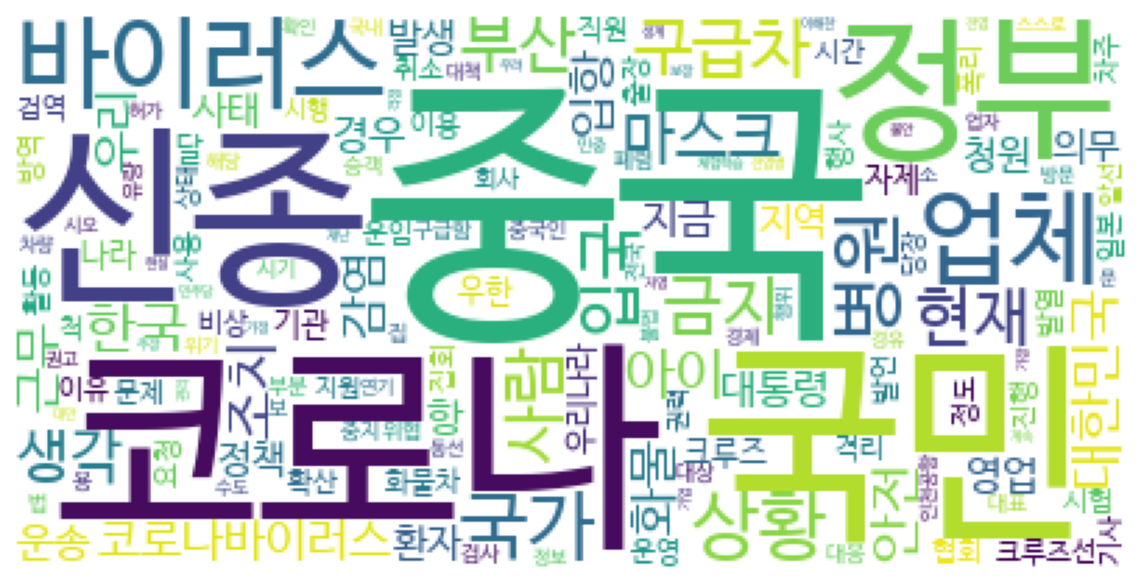

In [19]:
make_wordcloud(data)